In [2]:
using QuadGK
using Polynomials
using Plots

<a href="https://www.icsr.agh.edu.pl/~mownit/pdf/06_kwadratury.pdf"> Wykład </a>

Kwadratury Gaussa bazują na tzw. odciętych punktów Gaussa $x_{i}$ oraz współczynnikach $a_{i}$


In [5]:
# funkcja obliczająca odcięte punktów Gaussa oraz ich współczynniki 
(xp,a)=gauss(Float64,7)


([-0.949108, -0.741531, -0.405845, 0.0, 0.405845, 0.741531, 0.949108], [0.129485, 0.279705, 0.38183, 0.417959, 0.38183, 0.279705, 0.129485])

Podstawowe użycie w/w danych: 
aby policzyć $\int_{-1}^{1} f dx$  używamy odciętych punktów wraz z wagami wg wzoru 
$\sum_{i=1}^{n}{a_{i}f(x_{i})}$


In [3]:
f(x)=x^2
sum(a .* f.(xp)) 

0.6666666666666669

### Zadanie 1
- Korzytając z pakietu <a href="https://github.com/JuliaMath/Polynomials.jl">Polynomials</a> zaimplentuj wielomiany Legendre'a zdefiniowane w taki sposób:

$P_{0}(x)=1$

$P_{1}(x)=x$

$P_{k+1}(x)=\frac{2k+1}{k+1} x P_{k}(x)-\frac{k}{k+1}P_{k-1}(x)$

- narysuj ich wykresy w przedziale (-1,1). 
- sprawdź(np. za pomocą fukcji <i>roots</i> z pakietu Polynomials), że ich zera  sa odciętymi punktów Gaussa. Test wykonaj dla wielomianow od 2 do 4 stopnia
- podaj związek tego faktu z podstawowym twierdzeniem kwadratur Gaussa (z wykładu)

In [3]:
function Legendre(n)
    if n==0
        return Poly([1])
    end
    if n==1
        return Poly([0,1])
    end
    return ((2*n-1)/n)*Poly([0,1])*Legendre(n-1) - (n-1)/n*Legendre(n-2)
end

Legendre (generic function with 1 method)

In [6]:
xs = -1:0.01:1

ys_0 = [polyval(Legendre(0), x) for x in xs]
ys_1 = [polyval(Legendre(1), x) for x in xs]
ys_2 = [polyval(Legendre(2), x) for x in xs]
ys_3 = [polyval(Legendre(3), x) for x in xs]
ys_4 = [polyval(Legendre(4), x) for x in xs]
ys_5 = [polyval(Legendre(5), x) for x in xs]

201-element Array{Float64,1}:
 -1.0000000000000002  
 -0.8551803929625001  
 -0.7204462748000007  
 -0.5953917023875     
 -0.47961999359999963 
 -0.37274363281249967 
 -0.27438417639999985 
 -0.18417215823750102 
 -0.10174699520000022 
 -0.02675689266250039 
  0.041141249999999845
  0.10228193391249975 
  0.15699115520000015 
  ⋮                   
 -0.10228193391249975 
 -0.041141249999999845
  0.02675689266250039 
  0.10174699520000022 
  0.18417215823750102 
  0.27438417639999985 
  0.37274363281249967 
  0.47961999359999963 
  0.5953917023875     
  0.7204462748000007  
  0.8551803929625001  
  1.0000000000000002  

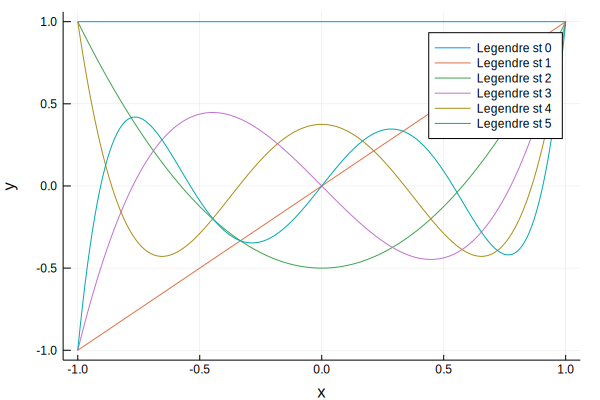

In [7]:
plot(xs, ys_0, label="Legendre st 0", xlabel="x", ylabel="y")
plot!(xs, ys_1, label="Legendre st 1")
plot!(xs, ys_2, label="Legendre st 2")
plot!(xs, ys_3, label="Legendre st 3")
plot!(xs, ys_4, label="Legendre st 4")
plot!(xs, ys_5, label="Legendre st 5")

In [11]:
l2 = Legendre(2)
l3 = Legendre(3)
l4 = Legendre(4)

l2_roots = roots(l2)
(xp,a)=gauss(Float64,2)

([-0.57735, 0.57735], [1.0, 1.0])

In [12]:
l3_roots = roots(l3)
(xp,a)=gauss(Float64,3)

([-0.774597, 0.0, 0.774597], [0.555556, 0.888889, 0.555556])

In [13]:
l4_roots = roots(l4)
(xp,a)=gauss(Float64,4)

([-0.861136, -0.339981, 0.339981, 0.861136], [0.347855, 0.652145, 0.652145, 0.347855])

### Zadanie 2
- Napisz funkcję, która dla podanej liczby punktów Gaussa $k$ oraz funkcji $f$  policzy $\int_{-1}^{1} f dx$
metodą używającą funkcji:
```julia
gauss(k)
```
oraz sumy 
```julia
sum(a .* f.(xp)) 
```
- przetestuj dla wielomianów coraz większych stopni
- sprawdz kiedy przestaje być dokładna, 
- podaj związek z twierdzeniem o  stopniu dokładności kwadratury Gaussa 

In [28]:
function integrate_gauss(f,k)
    (xp,a)=gauss(Float64,k)
    sum(a .* f.(xp))
end

integrate_gauss (generic function with 1 method)

In [18]:
integrate_gauss(x->x^2, 3)

0.6666666666666667

In [19]:
integrate_gauss(x->x^3, 3)

0.0

In [20]:
integrate_gauss(x->x^4, 3)

0.4000000000000001

In [22]:
integrate_gauss(x->x^5, 3)

0.0

In [23]:
integrate_gauss(x->x^6, 3)
#0.2857

0.24000000000000007

In [25]:
integrate_gauss(x->x^2, 2)

0.6666666666666667

In [26]:
integrate_gauss(x->x^3, 2)

0.0

In [27]:
integrate_gauss(x->x^4, 2)
#0.4

0.2222222222222223

### Zadanie 3
 
Skorzystaj z rozwiązania zadania 2 do napisania funkcji 
liczącej  całki w dowolnym przedziale $\int_{a}^{b} f(x) dx$ 

dokonując normalizacji  do $\int_{-1}^{1} F(z) dz$ 

podstawiając:

$x=\frac{b+a}{2}+ \frac{b-a}{2} z $ oraz 

$dx =\frac{b-a}{2} dz $

Przetestuj działanie na kilku przykładach i sprawdź z wynikami otrzymanymi analitycznie.


In [29]:
function normalize(f::Function, a, b)
      return z -> ((b-a)/2)*f((a+b)/2 + (b-a)*z/2)
end

function integrate(f, a, b, k)
    g = normalize(f, a, b)
    integrate_gauss(g,k)
end

integrate (generic function with 2 methods)

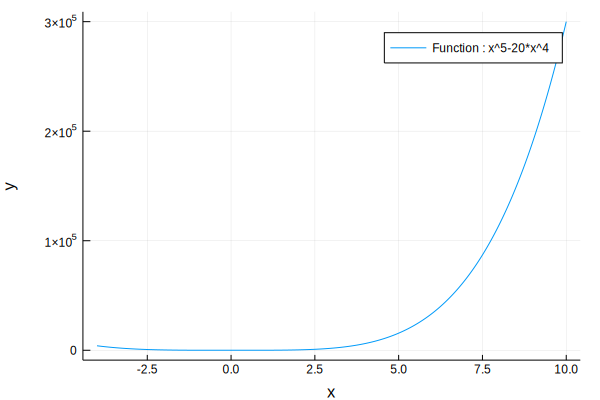

In [43]:
x_examp = -4:0.01:10

y_examp = [x^5+20*x^4 for x in x_examp]
plot(x_examp, y_examp, label="Function : x^5-20*x^4", xlabel="x", ylabel="y")

In [48]:
integrate(x->x^5+20*x^4, 5, 10, 2)

550564.2361111108

In [47]:
integrate(x->x^5+20*x^4, 5, 10, 6)

551562.5000000001

### Zadanie 4
Głowną funkcją pakietu QuadGK jest adaptacyjna funkcja <a href="https://juliamath.github.io/QuadGK.jl/stable/#QuadGK.quadgk"> guadgk</a> używająca całkowania  Gauss-Kronroda

- użyj tej funkcji do policzenia  całki dla przykładowego wielomianu.
- funkcja ta ma możliwość liczenia również całek do nieskończoności
 Policz całkę od minus do plus nieskonczonosci 
 standardowego rozkładu normalnego Gaussa
$ \frac{1}{\sqrt{2\pi}}exp(\frac{-x^2}{2})$

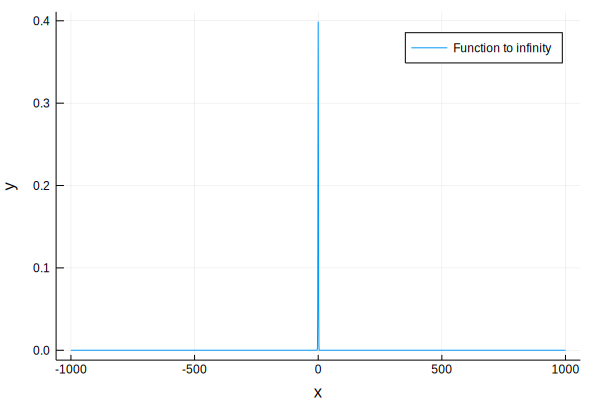

In [49]:
x_examp = -1000:1:1000

y_examp = [(1/sqrt(2*pi))*exp(-(x^2)/2) for x in x_examp]
plot(x_examp, y_examp, label="Function to infinity", xlabel="x", ylabel="y")

In [50]:
quadgk(x -> (1/sqrt(2*pi))*exp(-(x^2)/2), -Inf, Inf)

(1.0000000000032583, 1.4395584941504537e-8)

In [51]:
quadgk(x->x^5+20*x^4, 5, 10)

(551562.5000000001, 1.1641532182693481e-10)

### Zadanie 5
Napisz własną funkcję całkującą metodą prostokątów albo trapezów. Narysuj wykres funkcji błędu
w stosunku do wyniku otrzymanego analitycznie 
w zaleznosci od ilosci potrzebnych przedziałów  dla przykładowego wielomianu.